In [31]:
import matplotlib.pyplot as plot
import matplotlib.image as image
import math
import numpy as np

In [2]:
class Image:
  def __init__(self, matrix, height, width, gray_level):
    self.matrix = matrix
    self.height = height
    self.width = width
    self.gray_level = gray_level

In [3]:
def readpgm(name) -> Image:
  with open(name, "r") as f:

    assert f.readline() ==  'P2\n'
    line = f.readline()
    while (line[0] == '#'):
      line = f.readline()

    (width, height) = [int(i) for i in line.split()]
    print (width, height)
    depth = int(f.readline())
    assert depth <= 255
    print (depth)


    img = []
    row = []
    j = 0
    for line in f:
      values = line.split()
      for val in values:
        row.append (int (val))
        j = j + 1
        if j >= width:
          img.append (row)
          j=0
          row = []
    pic = Image(matrix=img, height=height, width=width, gray_level=depth)    

  return pic

In [93]:
img = readpgm("../images/flower.pgm")

1024 683
255


In [5]:
print (np.asarray (img.matrix))

[[21 21 21 ... 28 28 28]
 [21 21 21 ... 28 28 28]
 [21 21 21 ... 28 28 28]
 ...
 [61 61 62 ... 85 84 83]
 [61 62 63 ... 85 84 82]
 [62 63 64 ... 86 84 81]]


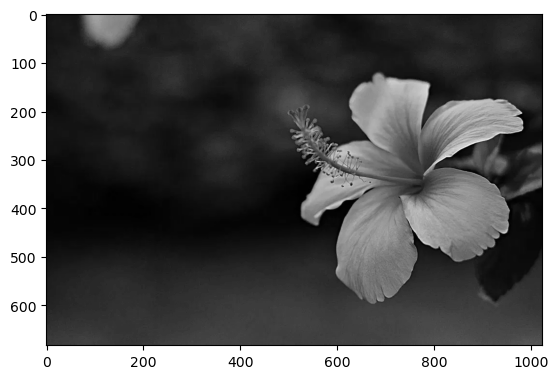

In [6]:
plot.imshow(img.matrix, cmap='gray')
plot.show()

## 1 Transformation vectors
- Negative
- Nth power
- Nth root
- Log
- Inverse log

In [89]:
gl = img.gray_level
T_neg = []
for i in range(gl+1):
  T_neg.insert(i,gl - i)


T_power = []
for i in range(gl+1):
  T_power.insert(i, int(pow(i, 2)/ pow(gl, 2) * gl))

T_root = []
for i in range(gl+1):
  T_root.insert(i, int(pow(i, .2)/ pow(gl, .2) * gl))


T_log = []
for i in range(gl+1):
    T_log.insert(i, int(math.log(i + 1, 10)/ math.log(gl + 1, 10) * gl))

T_exp = []
for i in range(gl+1):
    T_exp.insert(i, int(pow(2,i)/ pow(2, gl) * gl))

In [90]:
img_neg = np.zeros((img.height, img.width))
img_pow = np.zeros((img.height, img.width))
img_root = np.zeros((img.height, img.width))
img_log = np.zeros((img.height, img.width))
img_exp = np.zeros((img.height, img.width))

for i in range(img.height): 
  for j in range(img.width):
    img_neg[i][j] = T_neg[img.matrix[i][j]]
    img_pow[i][j] = T_power[img.matrix[i][j]]
    img_root[i][j] = T_root[img.matrix[i][j]]
    img_log[i][j] = T_log[img.matrix[i][j]]
    img_exp[i][j] = T_exp[img.matrix[i][j]]

Text(0.5, 1.0, 'Inverse log')

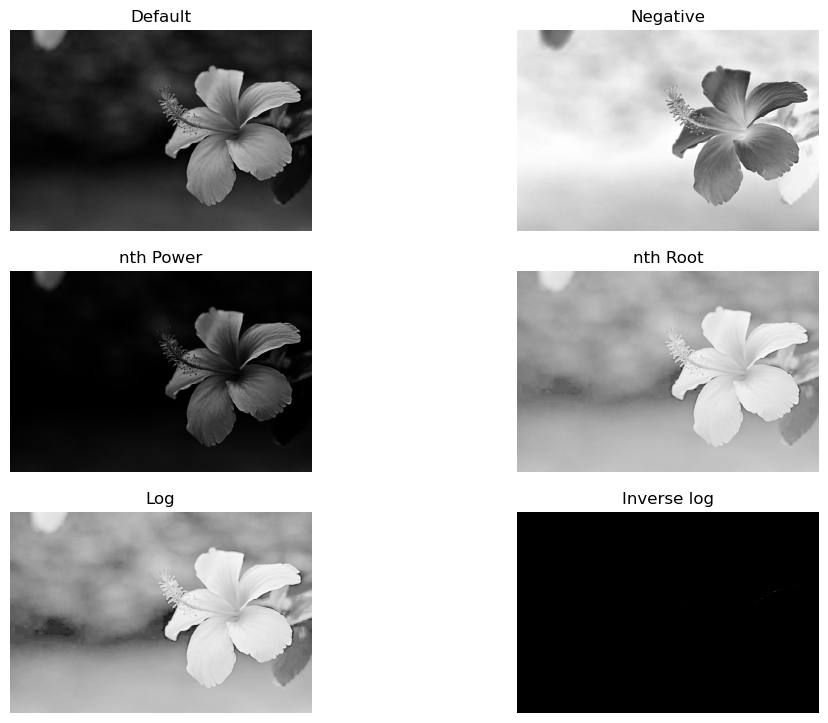

In [91]:
fig = plot.figure(figsize=(12, 12)) 
rows = 4
columns = 2

#Default
fig.add_subplot(rows, columns, 1) 
plot.imshow(img.matrix, cmap='gray')
plot.axis('off') 
plot.title("Default") 

#Negative
fig.add_subplot(rows, columns, 2) 
plot.imshow(img_neg, cmap='gray')
plot.axis('off') 
plot.title("Negative") 


#Power
fig.add_subplot(rows, columns, 3) 
plot.imshow(img_pow, cmap='gray')
plot.axis('off')
plot.title("nth Power") 


#Root
fig.add_subplot(rows, columns, 4)
plot.imshow(img_root, cmap='gray')
plot.axis('off') 
plot.title("nth Root") 


#Log
fig.add_subplot(rows, columns, 5)
plot.imshow(img_log, cmap='gray')
plot.axis('off') 
plot.title("Log") 

#Inverse log
fig.add_subplot(rows, columns, 6)
plot.imshow(img_exp, cmap='gray')
plot.axis('off') 
plot.title("Inverse log") 

### 1.1 Contrast stretching function

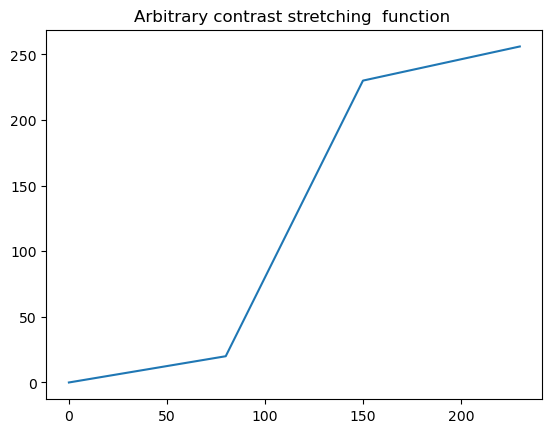

In [109]:
xpoints = np.array([0, 80, 150, 230])
ypoints = np.array([0, 20, 230, 256])
plot.plot(xpoints, ypoints)
plot.title("Arbitrary contrast stretching  function ") 
plot.show()

In [111]:
T_cs = []
for i in range(gl + 1):
  if i < 80:
    T_cs.insert(i, int(i/4))
  elif i >= 80 and i < 150:
    T_cs.insert(i, int(3*i - 220))
  else:
    T_cs.insert(i, int((13*i + 7250)/40))

In [112]:
img_cs = np.zeros((img.height, img.width))
for i in range(img.height): 
  for j in range(img.width):
    img_cs[i][j] = T_cs[img.matrix[i][j]]

Text(0.5, 1.0, 'Result of contrast stretching')

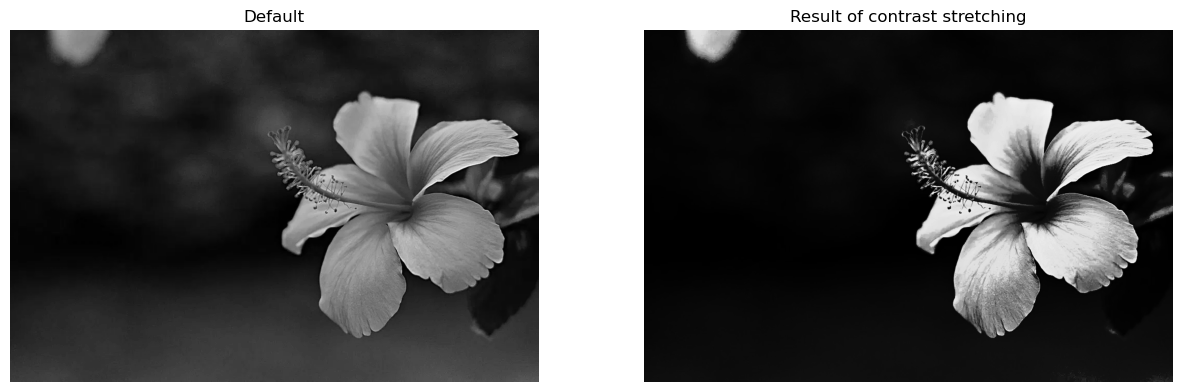

In [113]:
fig = plot.figure(figsize=(15, 15)) 
rows = 1
columns = 2

#Default
fig.add_subplot(rows, columns, 1) 
plot.imshow(img.matrix, cmap='gray')
plot.axis('off') 
plot.title("Default") 

#Negative
fig.add_subplot(rows, columns, 2) 
plot.imshow(img_cs, cmap='gray')
plot.axis('off') 
plot.title("Result of contrast stretching") 


### 1.2 Thresholding function

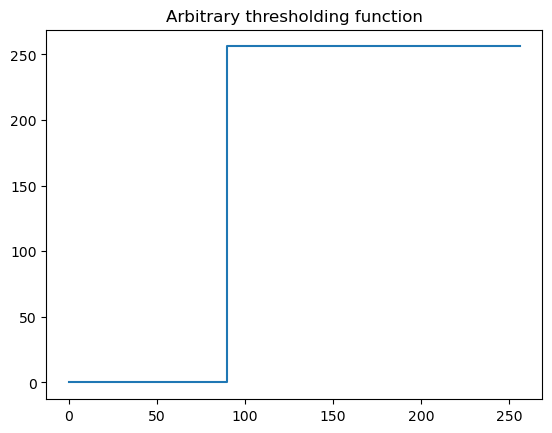

In [120]:
xpoints = np.array([0, 90, 90, 256])
ypoints = np.array([0, 0, 256, 256])
plot.plot(xpoints, ypoints)
plot.title("Arbitrary thresholding function") 
plot.show()

In [121]:
T_th = []
for i in range(gl + 1):
  value = 0 if i <= 90 else 256
  T_th.insert(i, value)

In [122]:
img_th = np.zeros((img.height, img.width))
for i in range(img.height): 
  for j in range(img.width):
    img_th[i][j] = T_th[img.matrix[i][j]]

Text(0.5, 1.0, 'Result of thresholding')

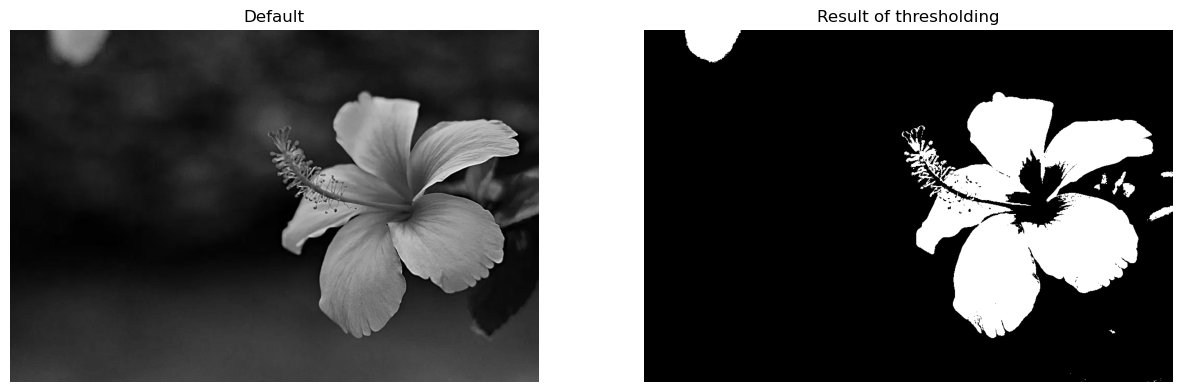

In [124]:
fig = plot.figure(figsize=(15, 15)) 
rows = 1
columns = 2

#Default
fig.add_subplot(rows, columns, 1) 
plot.imshow(img.matrix, cmap='gray')
plot.axis('off') 
plot.title("Default") 

#Negative
fig.add_subplot(rows, columns, 2) 
plot.imshow(img_th, cmap='gray')
plot.axis('off') 
plot.title("Result of thresholding") 
